In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [2]:
subscription_key='cfed609ad3ef4031bb274bb3e808e302'

In [3]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

In [4]:
image_url='https://images.unsplash.com/photo-1630163670776-0f64ec1acf1d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MjIwfHxwYXJ0eXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=400&q=60'

In [5]:
img = Image.open(BytesIO(requests.get(image_url).content))

In [6]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
'returnFaceID': 'true',
'returnFaceAttributes': 'age,gender,emotion'
}

In [7]:
data = {'url':image_url}

In [8]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)
faces = response.json()
faces

[{'faceId': '78378c65-e6b8-4e92-ae89-228d340c33a8',
  'faceRectangle': {'top': 16, 'left': 240, 'width': 59, 'height': 59},
  'faceAttributes': {'gender': 'male',
   'age': 31.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'd3f00263-40b4-4d5d-96c3-f3f255e09737',
  'faceRectangle': {'top': 167, 'left': 142, 'width': 58, 'height': 58},
  'faceAttributes': {'gender': 'female',
   'age': 24.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'f4689e82-79a2-4d90-a0cc-dba9c8248b21',
  'faceRectangle': {'top': 72, 'left': 174, 'width': 49, 'height': 49},
  'faceAttributes': {'gender': 'female',
   'age': 30.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
   

In [9]:
draw = ImageDraw.Draw(img)

In [10]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)),outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = face_info['gender']
    result = 'Gender:' +gender + 'happiness:' + str(happiness * 100)
    
    draw.text((left,top),result, fill='blue')

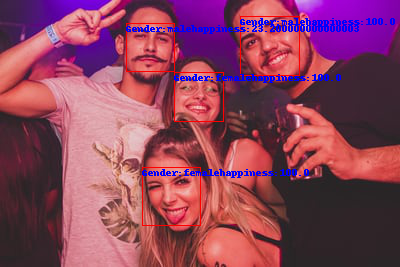

In [11]:
img